# 多子图

有时候需要从多个角度对数据进行对比。`Matplotlib` 为此提出了**子图**（`subplot`）的概念：在较大的图形中同时放置一组较小的坐标轴。  
这些子图可能是画中画（`inset`）、网格图（`grid of plots`），或者是其他更复杂的布局形式。  
在这一节中，我们将介绍四种用 `Matplotlib` 创建子图的方法。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

## 1. plt.axes：手动创建子图

创建坐标轴最基本的方法就是使用 `plt.axes` 函数。这个函数的默认配置是创建一个标准的坐标轴，填满整张图。  
它还有一个可选参数，由图形坐标系统的四个值构成。这四个值分别表示图形坐标系统的 `[bottom, left, width, height]`（底坐标、左坐标、宽度、高度），数值的取值范围是左下角（原点）为 0，右上角为 1。

如果想要在右上角创建一个画中画，那么可以首先将 x 与 y 设置为 0.65（就是坐标轴原点位于图形高度 65% 和宽度 65% 的位置），然后将 x 与 y 扩展到 0.2（也就是将坐标轴的宽度与高度设置为图形的20%）。

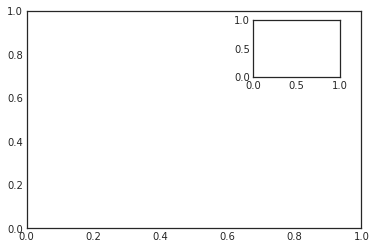

In [2]:
ax1 = plt.axes()                        # 默认坐标轴，画布中第一个子图，默认就是占满整个画布
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])  # 画布中第二个子图，四个参数设置了子图相对画布的位置及大小
# ax3 = plt.axes()                      # 如果此时再这样设置第三个子图，由于第三个子图占据了整个画布，则前两个子图将被完全遮挡住

面向对象画图接口中类似的命令有 `fig.add_axes()`。用这个命令创建两个竖直排列的坐标轴：

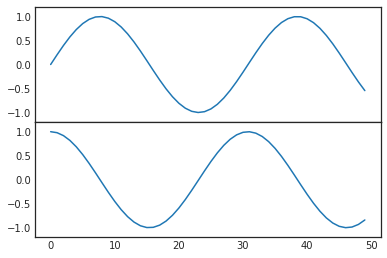

In [3]:
fig = plt.figure()                                                          # 画布
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))  # 第一个子图，占据画布的上半部分
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))                  # 第二个子图，占据画布的下半部分

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

## 2. plt.subplot：简易网格子图

若干彼此对齐的行列子图是常见的可视化任务，`Matplotlib` 拥有一些可以轻松创建它们的简便方法。  
最底层的方法是用 `plt.subplot()` 在一个网格中创建一个子图。  
这个命令有三个整型参数——将要创建的网格子图行数、列数和索引值，索引值从 1 开始，从左上角到右下角依次增大。

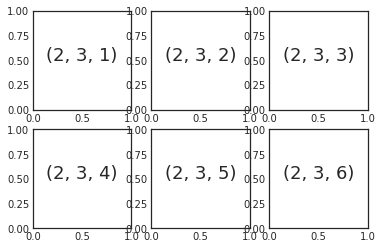

In [4]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

`plt.subplots_adjust` 命令可以调整子图之间的间隔。用面向对象接口的命令 `fig.add_subplot()` 可以取得同样的效果。

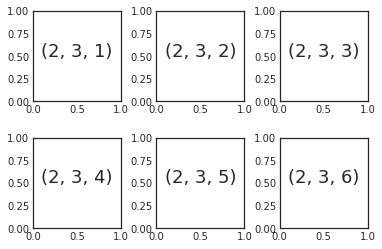

In [5]:
# 通过 plt.subplots_adjust 的 hspace 与 wspace 参数设置与图形高度与宽度一致的子图间距，数值以子图的尺寸为单位（在本例中，间距是子图宽度与高度的 40%）。
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

## 3. plt.subplots：用一行代码创建网格

当你打算创建一个大型网格子图时，就没办法使用前面那种亦步亦趋的方法了，尤其是当你想隐藏内部子图的 `x` 轴与 `y` 轴标题时。  
出于这一需求，`plt.subplots()` 实现了你想要的功能（需要注意此处 `subplots` 结尾多了个 s）。  
这个函数不是用来创建单个子图的，而是用一行代码创建多个子图，并返回一个包含子图的 `NumPy` 数组。  
关键参数是行数与列数，以及可选参数 `sharex` 与 `sharey`，通过它们可以设置不同子图之间的关联关系。

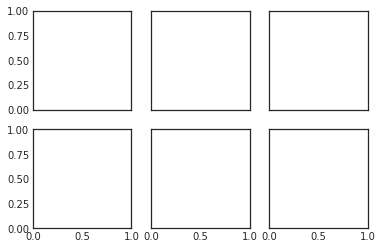

In [6]:
# 创建一个 2×3 网格子图，每行的 3 个子图使用相同的 y 轴坐标，每列的 2 个子图使用相同的 x 轴坐标
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

设置 `sharex` 与 `sharey` 参数之后，我们就可以自动去掉网格内部子图的标签，让图形看起来更整洁。  
坐标轴实例网格的返回结果是一个 `NumPy` 数组，这样就可以通过标准的数组取值方式轻松获取想要的坐标轴了：

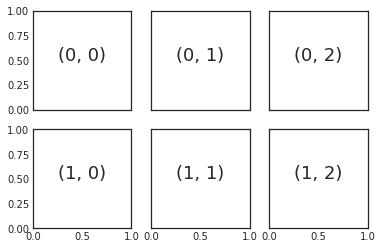

In [7]:
# 坐标轴存放在一个NumPy数组中，按照[row, col]取值
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

与 `plt.subplot()` 相比，`plt.subplots()` 与 `Python` 索引从 0 开始的习惯保持一致。
`plt.subplot()` 与 `MATLAB` 的索引类似，从 1 开始类似。

## 4. plt.GridSpec：实现更复杂的排列方式

如果想实现不规则的多行多列子图网格，`plt.GridSpec()` 是最好的工具。  
`plt.GridSpec()` 对象本身不能直接创建一个图形，它只是 `plt.subplot()` 命令可以识别的简易接口。  
可以通过类似 `Python` 切片的语法设置子图的位置和扩展尺寸。

In [8]:
# 一个带行列间距的 2×3 网格
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

<AxesSubplot:>

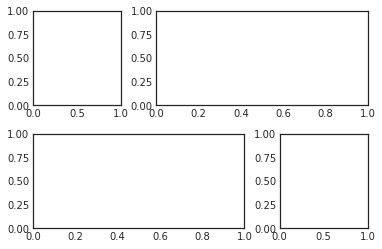

In [9]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])  # 合并单元格，html中的rowspan
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

这种灵活的网格排列方式用途十分广泛，我经常会用它来创建如下图所示的多轴频次直方图（`multi-axes histogram`）。

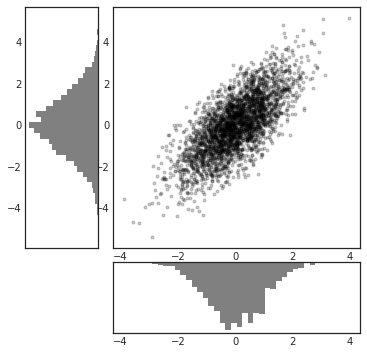

In [10]:
# 创建一些正态分布数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 设置坐标轴和网格配置方式
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 主坐标轴画散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 次坐标轴画频次直方图
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

这种类型的分布图十分常见，`Seaborn` 程序包提供了专门的 `API` 来实现它们。